# Diffusion du xénon dans le combustible nucléaire

Projet informatique, Alice PELOSSE & Clément PRAUD

## Modélisation d’un déplacement aléatoire d’atomes
Il s'agit de notre première étape, nécesaire avant de prendre en compte l'interaction avec la matrice de Zirconium et l'interaction entre atomes de Xénon.

Nous pensons gérer le problème avec des listes, chacune asociée à un type de particule. Les listes ont l'avantage par rapport aux array de numpy d'être de tailles varaibles et d'ainsi permettre à notre nombre d'entités pour chaque espèce de varier.
Ainsi, il nous faut générer 4 tableaux indépendants modélisant les atomes présents (Zr, O, C et Xe).
Pour chaque atomes on connait sa position (i,j) correspondant à la ligne et à la colonne dans la matrice.

A titre d'exemple, appeler Xe[10] retournera les coordonnées de l'atome 11 de Xénon (en convention de numérotation Python).

### Déplacement du Xénon

Pour un atome donné Xe on a une probabilité $P$ 
de se déplacer selon une des 9 directions (la 9eme étant on reste sur place).

Pour l'échelle de temps de diffusion, il faut regarder l'équation de diffusion. Nous pourrons ainsi, à l'aide des paramètres initiaux eterminer la longueur interessante pour la modélisation.

Pour la mise à jour de la position des atomes, on prend de manière aléatoire un atome dans le tableau Xe (fonction random) : en effet, il n'y a aucune raison de parcourir la liste dans l'ordre !

Dans un premiere temps, on ne tiendra pas compte du problème de superposition de deux atomes de Xénon.

#### Initialisation d'une distribution de xénon aléatoire

On place aléatoirement N atomes dans un tableau de taille LxL. Pour cela, on tire aléatoirement pour chaque particule deux nombres i et j entre 0 et L-1 qui correspondent à l'abscisse et l'ordonnée de la particule

[8 2]
[9 0]


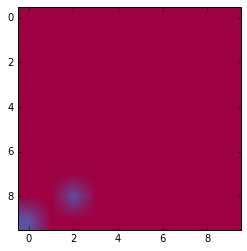

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  #avoir le graph dans le fichier

#Déclaration des varaibles


L=10                  #Taile de la matrice 
N=2                   #Nombres de particules initialement 
Nbre_Etapes=10       #Nombres d'instants dans l'expérience


def distribution_initiale(N,L):
    """
    Retourne la position des N particules présentes à l'état initial dans la matrice de taille NxN
    La distribution des position est aléatoire.
    Deux atomes peuvent être au même endroit.
    
    Exemple :
        
    >>> distribution_initiale_Xenon(2,10)
    [array([0, 5]), array([6, 2])]

    """
    n=[0]*N
    for i in range(N):
        n[i]=np.array([randint(0,L-1),randint(0,L-1)])
    return n
    
Xe=distribution_initiale(N,L)

M=np.zeros((L,L))

for i in range(N):
    p=Xe[i]
    print(p)
    M[p[0]][p[1]] =1
    
plt.imshow(M,cmap='Spectral')
plt.show()

Dans notre problème, le xénon arrive d'un coté de la céramique en oxycarbure de Zirconium. on se place en 2D et on suppose que le xénon est produit dans l'oxyde d'uranium situé à gauche de la gaine. Ainsi l'abscisse des particules au départ est fixé à 0 et l'ordonnée est tiré aléatoirement 

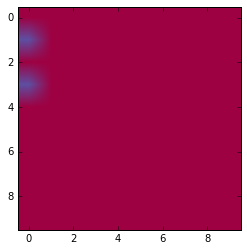

In [6]:
def distribution_initiale_xenon(N,L):
    """
    Retourne la position des N particules présentes à l'état initial dans la matrice de taille NxN
    La distribution des position est aléatoire.
    Deux atomes peuvent être au même endroit.
    
    Exemple :
        
    >>> distribution_initiale_Xenon(2,10)
    [array([0, 5]), array([6, 2])]

    """
    n=[0]*N
    for i in range(N):
        n[i]=np.array([randint(0,L-1),0]) #modification de l'abscisse par rapport au code précédent
    return n
    
Xe=distribution_initiale_xenon(N,L)

M=np.zeros((L,L))

for i in range(N):
    p=Xe[i]
    M[p[0]][p[1]] =1
    
plt.imshow(M,cmap='Spectral')
plt.show()

#### Marche aléatoire

En première approximation, pour modéliser la diffusion, on utilisera le modèle de marche aléatoire discrète. Chaque atome de xénon peu se déplacer dans chacune des directions.

##### Principe 

On considère deux lois de probabilité qui retourne {-1, 0, 1} avec la probabilité $p = \frac{1}{3}$ pour chaque valeur. Ainsi l'ordonnée et l'abscisse sont modifiés de manière aléatoire. On tiendra compte des conditions au bord; ainsi une particule ne peut pas sortir de la céramique pour le moment. 

|                  |               |               |
| :-----------:    | :-----------: | :-----------: |
| {-1,1}           | {0,1}         | {1,1}         |
| {-1,0}           | {0,0}         | {1,0}         |
| {-1,-1}          | {0,-1}        | {1,-1}        |




### Création et désintégration du Xénon,
Dans la liste des atomes de Xénon on enlève et ajoute des atomes selon la loi de désintégration de l'iode et de l'uranium et celle du xénon.
Cette loi est de la forme : $$ N(t) = N{o} \exp \left(\frac{-t}{\tau}\right) $$ avec N le nombre de particules à l'instant t et $N{o}$ le nombre de particules à l'instant initial.

*ajouter le graphique produit de fission avec temps de demi-vie
https://upload.wikimedia.org/wikipedia/commons/d/d5/Chaine_Xenon.PNG

code python désintegration iode et xenon 